In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datadir = '/nobackup/jakravit/data/HE60/batch_data/'
batch_name = 'case2V1'
inputs = pd.read_csv(datadir + '{}_inputs.csv'.format(batch_name), index_col=0)
outputs = pd.read_csv(datadir + '{}_outputs.csv'.format(batch_name), index_col=0)

In [26]:
noglintidx = inputs.index[inputs['Sg_included'] == 0]
noBridx = inputs.index[inputs['Br_included'] == 0]

cleanRrsIdx = inputs.index[(inputs['Sg_included'] == 0) & (inputs['Br_included'] == 0)]
glintIdx = inputs.index[(inputs['Sg_included'] == 1) & (inputs['Br_included'] == 0)]
brIdx = inputs.index[(inputs['Sg_included'] == 0) & (inputs['Br_included'] == 1)]
brGlintIdx = inputs.index[(inputs['Sg_included'] == 1) & (inputs['Br_included'] == 1)]

rrs = outputs.filter(regex='^rrs')
rrs.columns = np.arange(400, 902.5, 2.5)

<AxesSubplot:title={'center':'Benthic albedos'}>

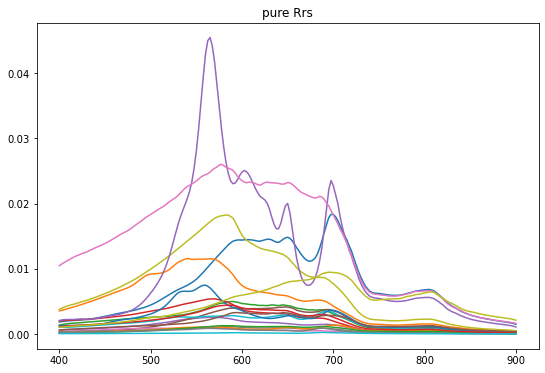

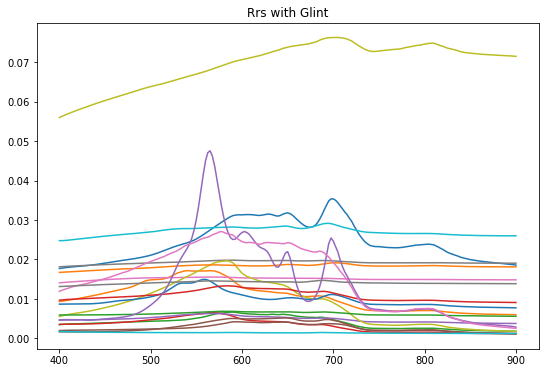

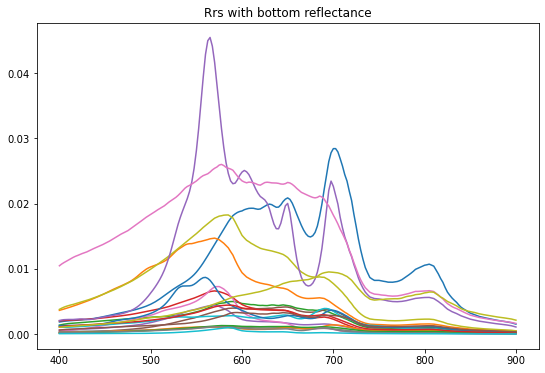

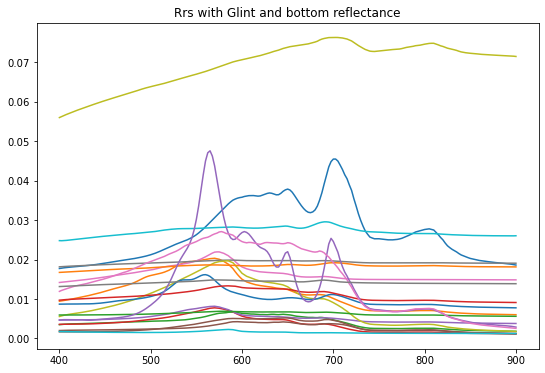

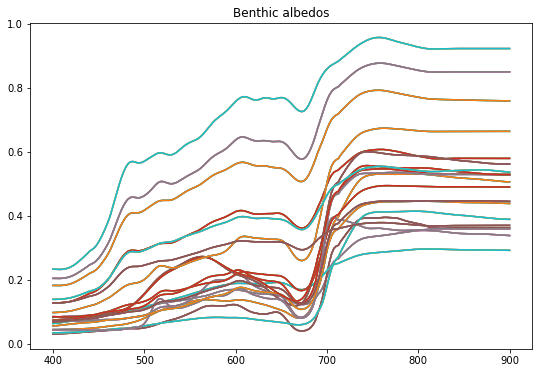

In [27]:
plt.rcParams["figure.figsize"] = (9,6)

# pure rrs - no glint, no rrs
rrs.loc[cleanRrsIdx,:].T.plot(legend=False, title='pure Rrs',)
                             # ylim=(0,.01))

# rrs with sunglint and no bottom reflectance
rrs.loc[glintIdx,:].T.plot(legend=False, title='Rrs with Glint')

# rrs with bottom reflectance and no glint
rrs.loc[brIdx,:].T.plot(legend=False, title='Rrs with bottom reflectance')

# rrs with bottom reflectance and glint
rrs.loc[brGlintIdx,:].T.plot(legend=False, title='Rrs with Glint and bottom reflectance')

# bottom reflectance
benthic = inputs.filter(regex='^benthic_tot')
benthic.columns = np.arange(400, 902.5, 2.5)
benthic.T.plot(legend=False, title='Benthic albedos',)
              # xlim=(400,500), ylim=(0,.1))

<AxesSubplot:title={'center':'sunglint'}>

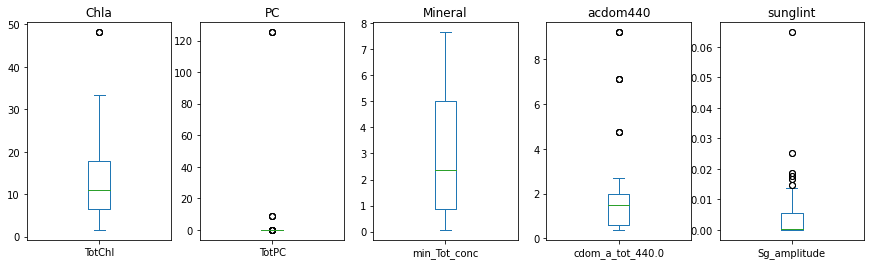

In [28]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(15,4))
inputs.TotChl.plot.box(ax=ax1, title='Chla')
try:
    inputs.TotPC.plot.box(ax=ax2, title='PC')
except:
    pass
inputs.min_Tot_conc.plot.box(ax=ax3, title='Mineral')
inputs['cdom_a_tot_440.0'].plot.box(ax=ax4, title='acdom440')
inputs['Sg_amplitude'].plot.box(ax=ax5, title='sunglint')

<AxesSubplot:ylabel='Fraction'>

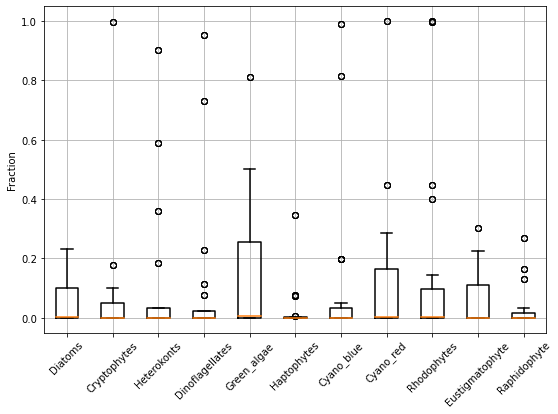

In [29]:
classes = ['Diatoms', 'Cryptophytes', 'Heterokonts', 'Dinoflagellates',
           'Green_algae', 'Haptophytes', 'Cyano_blue', 'Cyano_red', 'Rhodophytes',
           'Eustigmatophyte', 'Raphidophyte']

fractions = pd.DataFrame()
for c in classes:
    name = c + '_class_frxn'
    try:
        col = inputs[name]
    except:
        continue
    fractions[c] = col
    
fractions.plot(kind='box',
             color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             #flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=True, grid=True, rot=45,
             xlabel='PFT', ylabel='Fraction' )

<AxesSubplot:ylabel='Fraction'>

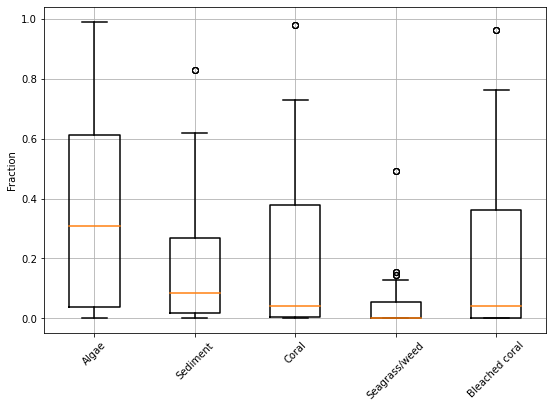

In [30]:
classes = ['Algae','Sediment','Coral','Seagrass/weed','Bleached coral']

fractions = pd.DataFrame()
for c in classes:
    name = 'benthic_{}_gfx'.format(c)
    try:
        col = inputs[name]
    except:
        continue
    fractions[c] = col
    
fractions.plot(kind='box',
             color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             #flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=True, grid=True, rot=45,
             xlabel='PFT', ylabel='Fraction' )